## The Goal: Test length of time needed to find significant differences in coupling index between CESM1 and CESM2. 
<br>
<b>Author:</b> Meg Fowler <br>
<b>Date:</b> 9 Sep 2020 <br><br>

In [1]:
# Import libraries 
import comet as cm 
import numpy as np 
import xarray as xr 
import pickle
import pandas as pd
import datetime 

# Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


In [49]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    
    import matplotlib as mpl
    import numpy as np
    
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


## Read in data for CESM1 and CESM2 simulations 

In [2]:
#cesm1dir   = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/CESM1/'
cesm1dir = '/glade/work/mdfowler/data/CESM1/'
cesm2dir = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/day/'

# CESM2 file name structures
middleName_cesm2 = '_day_CESM2_amip_r10i1p1f1_gn_'
varNames_cesm2   = ['hfls','hfss','mrso','mrsos','tas','hurs','ps']
timeName_flx2    = ['19700101-19791231','19800101-19891231', 
                    '19900101-19991231','20000101-20091231']
timeName_soil2   = ['19500101-19991231','20000101-20150101']

# CESM1 file name structures 
startCLM_cesm1 = 'cam5.1_amip_1d_002.clm2.h1.'
startCAM_cesm1 = 'cam5.1_amip_1d_002.cam2.h1.'
endCLM_cesm1   = '_soilliqOnly.nc'
endIce_cesm1   = '_soiliceOnly.nc'
endFLX_cesm1   = '_sfcFluxes.nc'
timeName_cesm1 = ['1979-1989', '1990-1999', '2000-2006']


In [6]:
# # Read in test file to get lat/lon (should be the same between sims)
# fileName = cesm1dir+startCAM_cesm1+timeName_cesm1[0]+endFLX_cesm1
# testDF   = xr.open_dataset(fileName, decode_times=True)

# # Get lat and lon 
# lat = testDF.lat.values
# lon = testDF.lon.values 


In [4]:
# Read in test file to get lat/lon 
fileName = cesm2dir+varNames_cesm2[0]+middleName_cesm2+timeName_flx2[0]+'.nc'
testDF   = xr.open_dataset(fileName, decode_times=True)

# Get lat and lon 
lat = testDF.lat.values
lon = testDF.lon.values 

/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


### Read in CESM1 data
<b>Note:</b> This portion is carried out on a compute node of Casper due to the size of the files needing to be read in. 

In [7]:
# Read in files and get time as usable format 
file1 = cesm1dir+startCAM_cesm1+timeName_cesm1[0]+endFLX_cesm1
flxDF = xr.open_dataset(file1, decode_times=True)
flxDF['time'] = flxDF.indexes['time'].to_datetimeindex()
print('File 1 finished reading in...')

file2  = cesm1dir+startCAM_cesm1+timeName_cesm1[1]+endFLX_cesm1
flxDF2 = xr.open_dataset(file2, decode_times=True) 
flxDF2['time'] = flxDF2.indexes['time'].to_datetimeindex()
print('File 2 finished reading in...')

file3  = cesm1dir+startCAM_cesm1+timeName_cesm1[2]+endFLX_cesm1
flxDF3 = xr.open_dataset(file3, decode_times=True) 
flxDF3['time'] = flxDF3.indexes['time'].to_datetimeindex()
print('File 3 finished reading in...')

# Concat in one array 
flux_full  = xr.concat([flxDF,  flxDF2, flxDF3], dim="time")


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


File 1 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  if __name__ == '__main__':


File 2 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


File 3 finished reading in...


In [8]:
# Read in files and get time as usable format 
file1 = cesm1dir+startCLM_cesm1+timeName_cesm1[0]+endCLM_cesm1
soilDF = xr.open_dataset(file1, decode_times=True)
soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
print('File 1 finished reading in...')
soilDF = soilDF.where(soilDF.levgrnd<2.12193400e-01, drop=True)  # Ignore lower down levels 

file2  = cesm1dir+startCLM_cesm1+timeName_cesm1[1]+endCLM_cesm1 
soilDF2 = xr.open_dataset(file2, decode_times=True) 
soilDF2['time'] = soilDF2.indexes['time'].to_datetimeindex()
print('File 2 finished reading in...')
soilDF2 = soilDF2.where(soilDF2.levgrnd<2.12193400e-01, drop=True)

file3  = cesm1dir+startCLM_cesm1+timeName_cesm1[2]+endCLM_cesm1 
soilDF3 = xr.open_dataset(file3, decode_times=True) 
soilDF3['time'] = soilDF3.indexes['time'].to_datetimeindex()
print('File 3 finished reading in...')
soilDF3 = soilDF3.where(soilDF3.levgrnd<2.12193400e-01, drop=True)

# Concat in one array 
soil_full  = xr.concat([soilDF,  soilDF2, soilDF3], dim="time")


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


File 1 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.


File 2 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  app.launch_new_instance()


File 3 finished reading in...


In [9]:
# Read in files and get time as usable format 
file1 = cesm1dir+startCLM_cesm1+timeName_cesm1[0]+endIce_cesm1
soilDF = xr.open_dataset(file1, decode_times=True)
soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
print('File 1 finished reading in...')
soilDF = soilDF.where(soilDF.levgrnd<2.12193400e-01, drop=True)  # Ignore lower down levels 

file2  = cesm1dir+startCLM_cesm1+timeName_cesm1[1]+endIce_cesm1 
soilDF2 = xr.open_dataset(file2, decode_times=True) 
soilDF2['time'] = soilDF2.indexes['time'].to_datetimeindex()
print('File 2 finished reading in...')
soilDF2 = soilDF2.where(soilDF2.levgrnd<2.12193400e-01, drop=True)

file3  = cesm1dir+startCLM_cesm1+timeName_cesm1[2]+endIce_cesm1 
soilDF3 = xr.open_dataset(file3, decode_times=True) 
soilDF3['time'] = soilDF3.indexes['time'].to_datetimeindex()
print('File 3 finished reading in...')
soilDF3 = soilDF3.where(soilDF3.levgrnd<2.12193400e-01, drop=True)

# Concat in one array 
soilIce_full  = xr.concat([soilDF,  soilDF2, soilDF3], dim="time")


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  after removing the cwd from sys.path.


File 1 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.


File 2 finished reading in...


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  app.launch_new_instance()


File 3 finished reading in...


In [10]:
# Load pressure level of LCL (computed separately in Get_LCLpressure.py and saved as pickle file)
lclPath = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/LCL-pressure-HeightAboveGround_CESM1.p'
Plcl    = pickle.load( open( lclPath, "rb" ) )


In [11]:
# To be able to easily access years, months, days - use Pandas 
dates_cesm1 = pd.DatetimeIndex(soil_full['time'].values)


In [12]:
# Read in land fraction 
filePath = '/glade/work/mdfowler/data/CESM1/cam5.1_amip_1d_002.clm2.h1.1979-01-01-00000.nc'
exDF = xr.open_dataset(filePath,decode_times=False)

landMask              = exDF.landmask.values.astype(float)
landMask[landMask==0] = np.nan

# landArea = exDF.area.values * exDF.landfrac.values

**Get 10 cm soil moisture by itself**

In [13]:
# Sum over top 4 levels to get top 11cm of soil water/ice 
soilLiq_11cm = np.nansum(soil_full.SOILLIQ.values,    axis=1)*landMask
soilIce_11cm = np.nansum(soilIce_full.SOILICE.values, axis=1)*landMask

# Get as close to "mrsos" as possible by including liq and ice, and dividing by land area 
soil_11cm = (soilLiq_11cm + soilIce_11cm)


In [14]:
# Mask Greenland and Antarctica (SM = 0 as time mean)
soilMean = np.nanmean(soil_11cm,0)

iceMask = np.ones([len(flux_full.lat.values),len(flux_full.lon.values)])

for i in range(len(flux_full.lat.values)):
    soilMean_sel = soilMean[i,:]
    iceMask[i, soilMean_sel>130] = np.nan

# Apply mask
soil_11cm = soil_11cm*iceMask


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


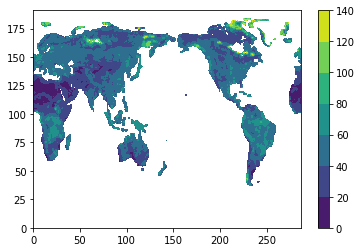

In [16]:
# Quick sanity check of upper level soil moisture...
plt.contourf(soil_11cm[10,:,:])
plt.colorbar()


### Read in CESM2 data
(This part done locally on laptop)

In [7]:
# Read in surface fluxes along

for iT in range(len(timeName_flx2)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    lhFile       = cesm2dir+varNames_cesm2[0]+middleName_cesm2+timeName_flx2[iT]+'.nc' # File name
    lhDF         = xr.open_dataset(lhFile,decode_times=True) 
    lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()

    # Sensible heat flux
    shFile       = cesm2dir+varNames_cesm2[1]+middleName_cesm2+timeName_flx2[iT]+'.nc' # File name
    shDF         = xr.open_dataset(shFile,decode_times=True)
    shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

    if iT==0:
        lhflx_full = lhDF 
        shflx_full = shDF
    else: 
        lhflx_full = xr.concat([lhflx_full, lhDF], dim="time")
        shflx_full = xr.concat([shflx_full, shDF], dim="time")

    print('Done with ', timeName_flx2[iT])



<ipython-input-7-7ee6676c4e1f>:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'hfss' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
<ipython-input-7-7ee6676c4e1f>:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to date

Done with  19700101-19791231
Done with  19800101-19891231
Done with  19900101-19991231
Done with  20000101-20091231


In [8]:
# Read in soil moisture

for iT in range(len(timeName_soil2)):

    # --- Compile soil moisture into singe large arrays in time 
    soil10File = cesm2dir+varNames_cesm2[3]+middleName_cesm2+timeName_soil2[iT]+'.nc' # File name
    soil10DF   = xr.open_dataset(soil10File,decode_times=True)
    soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()
    
    if iT==0:
        soilM10_full = soil10DF
    else: 
        soilM10_full = xr.concat([soilM10_full, soil10DF], dim="time")

    print('Done with ', timeName_soil2[iT])



/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'mrsos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
<ipython-input-8-65fe1db529c7>:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()


Done with  19500101-19991231
Done with  20000101-20150101


In [9]:
# Load pressure level of LCL (computed separately in Get_LCLpressure.py and saved as pickle file)
lclPath = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/LCL-pressure-HeightAboveGround_1970-2014.p'
Plcl    = pickle.load( open( lclPath, "rb" ) )


**Get same time period for all variables**

In [10]:
# Limit time period of soil moisture: 
dates       = pd.DatetimeIndex(soilM10_full['time'].values)
iIncludeSM  = np.where((dates.year>=1979) & (dates.year<=2006))[0]
soilM10_sel = np.asarray(soilM10_full.mrsos.values)[iIncludeSM,:,:]

# Now limit the time period of everything else 
dates     = pd.DatetimeIndex(lhflx_full['time'].values)
iInclude  = np.where((dates.year>=1979) & (dates.year<=2006))[0]
dates     = dates[iInclude]

SHflx_sel = np.asarray(shflx_full.hfss.values)[iInclude,:,:]
lhflx_sel = lhflx_full.isel(time=iInclude)
Plcl_sel  = Plcl[iInclude,:,:]


## Compute coupling index in select period

In [39]:
# Define period of interest 
strtYear = 1991
endYear  = 2000

# For writing out to a file, define string yr label
strLabel = str(strtYear)+'-'+str(endYear)+'.nc'
print(strLabel)

1991-2000.nc


### Compute for CESM1 
<b>Note:</b> This portion is carried out on a compute node of Casper due to the size of the files needing to be read in.

In [40]:
# Get indices of this time period 
iInclude = np.where((dates_cesm1.year>=strtYear) & (dates_cesm1.year<=endYear))[0]

# Limit data to this period 
soil_11cm_sel = soil_11cm[iInclude,:,:]
Plcl_sel      = Plcl[iInclude,:,:]
flux_full_sel = flux_full.isel(time=iInclude)

print(np.shape(soil_11cm_sel))

(3650, 192, 288)


In [41]:
# Make one big xr.Dataset containing all the information we need  
dFull = flux_full_sel
dFull['soilM_10'] = (('time','lat','lon'), soil_11cm_sel)
dFull['Plcl'] = (('time','lat','lon'), Plcl_sel)


**Get terra coupling with LH and SM**

In [42]:
# Compute coupling index
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(dFull, xname='soilM_10',yname='LHFLX',averaging='season')

# Save to netCDF file
terra_LH_dir  = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/'
terra_LH_file = terra_LH_dir+'CESM1_TerraLeg_coupling_lhf_vs_soilm_'+strLabel
terra_coupling.to_netcdf(terra_LH_file)


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Terrestrial Coupling Index (11cm SM and LHFLX) [DJF]')

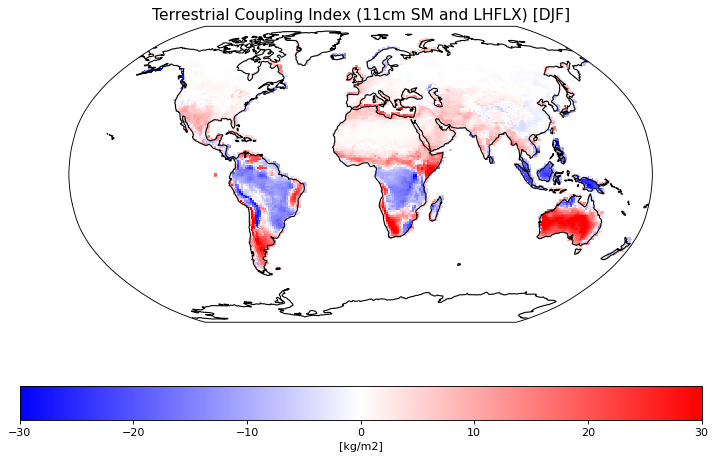

In [43]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.soilM_10_LHFLX_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (11cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)


**Get terra coupling with SH and SM**

In [44]:
# Compute coupling index 
terraLeg_coupling = cm.metrics.CouplingIndex()
terraLeg_coupling = terraLeg_coupling.compute(dFull, xname='soilM_10',yname='SHFLX',averaging='season')

# Save to netCDF file
terra_SH_dir  = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/'
terra_SH_file = terra_SH_dir+'CESM1_TerraLeg_coupling_shf_vs_soilm_'+strLabel
terraLeg_coupling.to_netcdf(terra_SH_file)


/glade/work/mdfowler/my_npl_clone/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


**Get atmospheric leg coupling with SH and Plcl**

In [45]:
# Compute coupling index 
atmoLeg_coupling = cm.metrics.CouplingIndex()
atmoLeg_coupling = atmoLeg_coupling.compute(dFull, xname='SHFLX',yname='Plcl',averaging='season')

# Save to netCDF file 
atmo_dir  = '/glade/work/mdfowler/scripts/Coupling_CAM6CLM5/processed_data/'
atmo_file = terra_SH_dir+'CESM1_AtmoLeg_coupling_Plcl_vs_shf_'+strLabel
atmoLeg_coupling.to_netcdf(atmo_file)


### Compute for CESM2 
(carried out locally on laptop)

In [40]:
# Get indices of this time period 
iInclude = np.where((dates.year>=strtYear) & (dates.year<=endYear))[0]

# Limit data to this period 
soilM10_sel2  = soilM10_sel[iInclude,:,:]
Plcl_sel2     = Plcl_sel[iInclude,:,:]
lhflx_sel2    = lhflx_sel.isel(time=iInclude)
SHflx_sel2    = SHflx_sel[iInclude,:,:]

print(np.shape(SHflx_sel2))

(3650, 192, 288)


In [41]:
# Make one big xr.Dataset containing all the information we need  
dFull = lhflx_sel2
dFull['soilM_10'] = (('time','lat','lon'), soilM10_sel2)
dFull['Plcl'] = (('time','lat','lon'),     Plcl_sel2)
dFull['hfss'] = (('time','lat','lon'),     SHflx_sel2)


**Get terra coupling with LH and SM**

In [42]:
# Compute coupling index
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(dFull, xname='soilM_10',yname='hfls',averaging='season')

# Save to netCDF file
terra_LH_dir  = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/'
terra_LH_file = terra_LH_dir+'CESM2_TerraLeg_coupling_lhf_vs_soilm_'+strLabel
terra_coupling.to_netcdf(terra_LH_file)


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'Terrestrial Coupling Index (11cm SM and LHFLX) [DJF]')

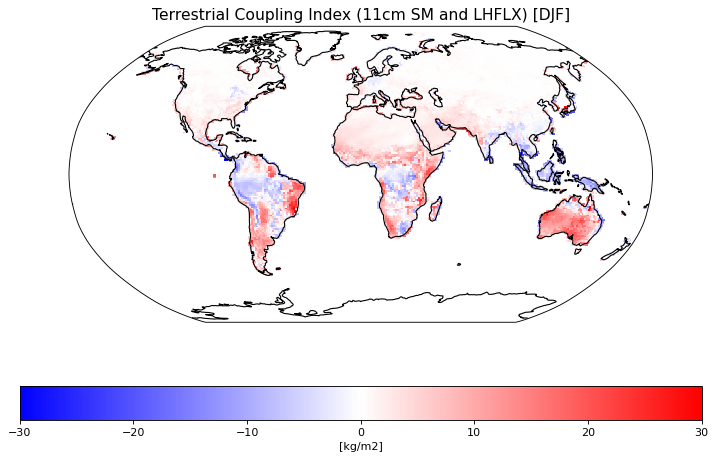

In [43]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.soilM_10_hfls_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (11cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)


**Get terra coupling with SH and SM**

In [44]:
# Compute coupling index 
terraLeg_coupling = cm.metrics.CouplingIndex()
terraLeg_coupling = terraLeg_coupling.compute(dFull, xname='soilM_10',yname='hfss',averaging='season')

# Save to netCDF file
terra_SH_dir  = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/'
terra_SH_file = terra_SH_dir+'CESM2_TerraLeg_coupling_shf_vs_soilm_'+strLabel
terraLeg_coupling.to_netcdf(terra_SH_file)


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


**Get atmospheric leg of coupling with SH and Plcl**

In [45]:
# Compute coupling index 
atmoLeg_coupling = cm.metrics.CouplingIndex()
atmoLeg_coupling = atmoLeg_coupling.compute(dFull, xname='hfss',yname='Plcl',averaging='season')

# Save to netCDF file 
atmo_dir  = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/'
atmo_file = terra_SH_dir+'CESM2_AtmoLeg_coupling_Plcl_vs_shf_'+strLabel
atmoLeg_coupling.to_netcdf(atmo_file)


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


## Plot coupling index for both simulations - are there big differences between the two?

### Read in from netCDFs

In [108]:
# Set time period string 
timeStr = '1980-1985'

# Set up file names  
mainDir = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/'

fileCESM1_terraLH = mainDir+'CESM1_TerraLeg_coupling_lhf_vs_soilm_'+timeStr+'.nc'
fileCESM1_terraSH = mainDir+'CESM1_TerraLeg_coupling_shf_vs_soilm_'+timeStr+'.nc'
fileCESM1_atmos   = mainDir+'CESM1_AtmoLeg_coupling_Plcl_vs_shf_'+timeStr+'.nc'

fileCESM2_terraLH = mainDir+'CESM2_TerraLeg_coupling_lhf_vs_soilm_'+timeStr+'.nc'
fileCESM2_terraSH = mainDir+'CESM2_TerraLeg_coupling_shf_vs_soilm_'+timeStr+'.nc'
fileCESM2_atmos   = mainDir+'CESM2_AtmoLeg_coupling_Plcl_vs_shf_'+timeStr+'.nc'


In [109]:
# Open nc files into xr datasets 
atmoLeg_cesm1  = xr.open_dataset(fileCESM1_atmos,   decode_times=False)
terraLeg_cesm1 = xr.open_dataset(fileCESM1_terraSH, decode_times=False)
terraLH_cesm1  = xr.open_dataset(fileCESM1_terraLH, decode_times=False)

atmoLeg_cesm2  = xr.open_dataset(fileCESM2_atmos,   decode_times=False)
terraLeg_cesm2 = xr.open_dataset(fileCESM2_terraSH, decode_times=False)
terraLH_cesm2  = xr.open_dataset(fileCESM2_terraLH, decode_times=False)


### Set up colormaps

In [110]:
### Create a list of RGB tuples
colorsList_SMvLHF = [(127,58,144), 
                     (67,81,163),
                     (0,191,243),
                     (194,229,220),
                     (124,194,66),
                     (227,219,46),
                     (250,175,44),
                     (245,127,36), 
                     (239,67,54),
                     (238,45,122),
                     (162,6,66)] # This example uses the 8-bit RGB

#colors = [(15,19,135), (9,61,240), (35,93,209), (43,156,222),(90,193,253), 
#           (221,238,247), (246,246,22),(246,186,22),(246,126,22), (246,67,22),(255,24,16)] # This example uses the 8-bit RGB
my_cmap_SMvLHF = make_cmap(colorsList_SMvLHF, bit=True)



### Create a list of RGB tuples for terrestrial leg (SM, SHFLX)
colorsList_SMvSHF = [(124,135,181), 
                     (107,109,161),
                     (51,82,120),
                     (49,114,127),
                     (97,181,89),
                     (200,218,102),
                     (255,242,116),
                     (238,164,58)] # This example uses the 8-bit RGB

my_cmap_SMvSHF = make_cmap(colorsList_SMvSHF, bit=True)



### Create a list of RGB tuples for atmospheric leg (SHFLX, P_lcl)
colorsList_SHFvPlcl = [(172,183,209), 
                     (124,135,181),
                     (51,82,120),
                     (97,181,89),
                     (200,218,102),
                     (255,242,116),
                     (238,164,58),
                     (136,90,59),
                     (214,48,44),
                     (224,93,126),
                     (242,189,177)] # This example uses the 8-bit RGB

my_cmap_SHFvPlcl = make_cmap(colorsList_SHFvPlcl, bit=True)


### Plots for LH - SM coupling

In [111]:
# --- Define array of colors for maps --- #

# Isolate seasonal arrays (seasons go: DJF,JJA,MAM,SON)
LHcoupl_JJA_cesm1 = np.squeeze(np.asarray(terraLH_cesm1.soilM_10_LHFLX_CI[1,:,:]))
LHcoupl_DJF_cesm1 = np.squeeze(np.asarray(terraLH_cesm1.soilM_10_LHFLX_CI[0,:,:]))
LHcoupl_JJA_cesm2 = np.squeeze(np.asarray(terraLH_cesm2.soilM_10_hfls_CI[1,:,:]))
LHcoupl_DJF_cesm2 = np.squeeze(np.asarray(terraLH_cesm2.soilM_10_hfls_CI[0,:,:]))


# Make cyclic first 
LHcoupl_JJA_cyclic_cesm1, lon_cyclic = cartopy.util.add_cyclic_point(LHcoupl_JJA_cesm1, lon)
LHcoupl_DJF_cyclic_cesm1, lon_cyclic = cartopy.util.add_cyclic_point(LHcoupl_DJF_cesm1, lon)
LHcoupl_JJA_cyclic_cesm2, lon_cyclic = cartopy.util.add_cyclic_point(LHcoupl_JJA_cesm2, lon)
LHcoupl_DJF_cyclic_cesm2, lon_cyclic = cartopy.util.add_cyclic_point(LHcoupl_DJF_cesm2, lon)


# Now get color coded arrays 
colorsSMvLHF_JJA_cesm1 = np.full([len(lat),len(lon)+1],np.nan)
colorsSMvLHF_DJF_cesm1 = np.full([len(lat),len(lon)+1],np.nan)
colorsSMvLHF_JJA_cesm2 = np.full([len(lat),len(lon)+1],np.nan)
colorsSMvLHF_DJF_cesm2 = np.full([len(lat),len(lon)+1],np.nan)

# ----- CESM 1 ---------

# JJA 
colorsSMvLHF_JJA_cesm1[np.where(LHcoupl_JJA_cyclic_cesm1<-15)]                                = 1
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>-15) & (LHcoupl_JJA_cyclic_cesm1<=-10))]  = 2
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>-10) & (LHcoupl_JJA_cyclic_cesm1<=-5))]   = 3
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>-5)  & (LHcoupl_JJA_cyclic_cesm1<=5))]    = 4
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>5)   & (LHcoupl_JJA_cyclic_cesm1<=10))]   = 5
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>10)  & (LHcoupl_JJA_cyclic_cesm1<=15))]   = 6
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>15)  & (LHcoupl_JJA_cyclic_cesm1<=20))]   = 7
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>20)  & (LHcoupl_JJA_cyclic_cesm1<=25))]   = 8
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>25)  & (LHcoupl_JJA_cyclic_cesm1<=30))]   = 9
colorsSMvLHF_JJA_cesm1[np.where((LHcoupl_JJA_cyclic_cesm1>30)  & (LHcoupl_JJA_cyclic_cesm1<=35))]   = 10
colorsSMvLHF_JJA_cesm1[np.where(LHcoupl_JJA_cyclic_cesm1>35)]                                 = 11

# DJF 
colorsSMvLHF_DJF_cesm1[np.where(LHcoupl_DJF_cyclic_cesm1<-15)]                                = 1
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>-15) & (LHcoupl_DJF_cyclic_cesm1<=-10))]  = 2
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>-10) & (LHcoupl_DJF_cyclic_cesm1<=-5))]   = 3
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>-5)  & (LHcoupl_DJF_cyclic_cesm1<=5))]    = 4
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>5)   & (LHcoupl_DJF_cyclic_cesm1<=10))]   = 5
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>10)  & (LHcoupl_DJF_cyclic_cesm1<=15))]   = 6
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>15)  & (LHcoupl_DJF_cyclic_cesm1<=20))]   = 7
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>20)  & (LHcoupl_DJF_cyclic_cesm1<=25))]   = 8
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>25)  & (LHcoupl_DJF_cyclic_cesm1<=30))]   = 9
colorsSMvLHF_DJF_cesm1[np.where((LHcoupl_DJF_cyclic_cesm1>30)  & (LHcoupl_DJF_cyclic_cesm1<=35))]   = 10
colorsSMvLHF_DJF_cesm1[np.where(LHcoupl_DJF_cyclic_cesm1>35)]                                 = 11


# ----- CESM 2 ---------

# JJA 
colorsSMvLHF_JJA_cesm2[np.where(LHcoupl_JJA_cyclic_cesm2<-15)]                                = 1
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>-15) & (LHcoupl_JJA_cyclic_cesm2<=-10))]  = 2
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>-10) & (LHcoupl_JJA_cyclic_cesm2<=-5))]   = 3
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>-5)  & (LHcoupl_JJA_cyclic_cesm2<=5))]    = 4
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>5)   & (LHcoupl_JJA_cyclic_cesm2<=10))]   = 5
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>10)  & (LHcoupl_JJA_cyclic_cesm2<=15))]   = 6
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>15)  & (LHcoupl_JJA_cyclic_cesm2<=20))]   = 7
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>20)  & (LHcoupl_JJA_cyclic_cesm2<=25))]   = 8
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>25)  & (LHcoupl_JJA_cyclic_cesm2<=30))]   = 9
colorsSMvLHF_JJA_cesm2[np.where((LHcoupl_JJA_cyclic_cesm2>30)  & (LHcoupl_JJA_cyclic_cesm2<=35))]   = 10
colorsSMvLHF_JJA_cesm2[np.where(LHcoupl_JJA_cyclic_cesm2>35)]                                 = 11

# DJF 
colorsSMvLHF_DJF_cesm2[np.where(LHcoupl_DJF_cyclic_cesm2<-15)]                                = 1
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>-15) & (LHcoupl_DJF_cyclic_cesm2<=-10))]  = 2
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>-10) & (LHcoupl_DJF_cyclic_cesm2<=-5))]   = 3
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>-5)  & (LHcoupl_DJF_cyclic_cesm2<=5))]    = 4
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>5)   & (LHcoupl_DJF_cyclic_cesm2<=10))]   = 5
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>10)  & (LHcoupl_DJF_cyclic_cesm2<=15))]   = 6
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>15)  & (LHcoupl_DJF_cyclic_cesm2<=20))]   = 7
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>20)  & (LHcoupl_DJF_cyclic_cesm2<=25))]   = 8
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>25)  & (LHcoupl_DJF_cyclic_cesm2<=30))]   = 9
colorsSMvLHF_DJF_cesm2[np.where((LHcoupl_DJF_cyclic_cesm2>30)  & (LHcoupl_DJF_cyclic_cesm2<=35))]   = 10
colorsSMvLHF_DJF_cesm2[np.where(LHcoupl_DJF_cyclic_cesm2>35)]                                 = 11



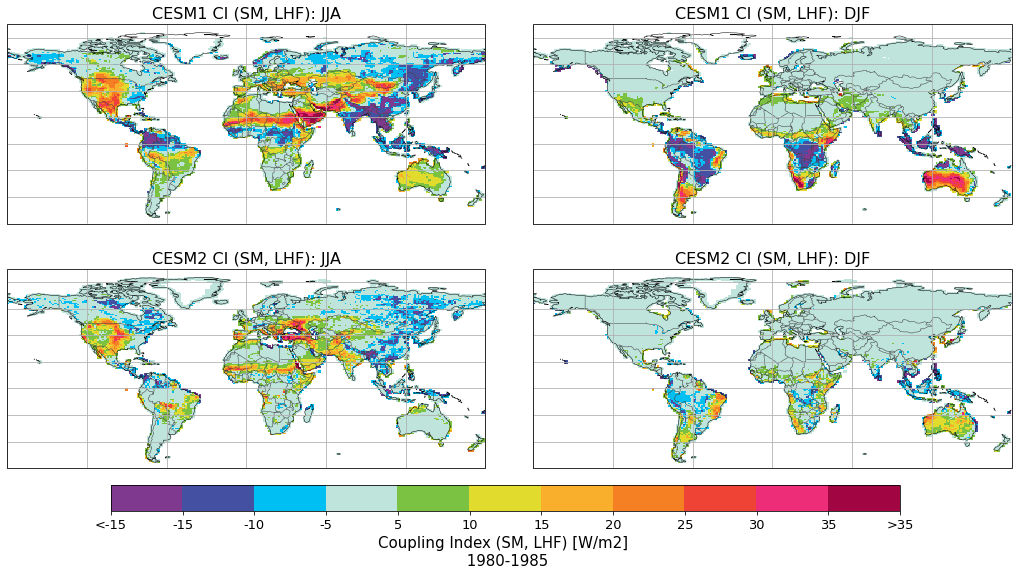

In [112]:
# Set up figure 
fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
#Adjust space between subplots 
fig.subplots_adjust(hspace = -0.4,wspace = 0.1)
#Put axs handles in array, axs 
axs = axs.ravel()

# ----- CESM1 panels -----  
# Set global-ish extent
axs[0].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())      
axs[1].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())       

# Set up color options 
bounds = [1,2,3,4,5,6,7,8,9,10,11,12]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
                           
# Contour plots 
contour_plot = axs[0].pcolormesh(lon_cyclic,lat,colorsSMvLHF_JJA_cesm1,norm=norm,
                             cmap=my_cmap_SMvLHF,
                             vmin=1,vmax=12)

contour_plot = axs[1].pcolormesh(lon_cyclic,lat,colorsSMvLHF_DJF_cesm1,norm=norm,
                             cmap=my_cmap_SMvLHF,
                             vmin=1,vmax=12)

# Additional options 
axs[0].set_title('CESM1 CI (SM, LHF): JJA',fontsize=16)
axs[1].set_title('CESM1 CI (SM, LHF): DJF',fontsize=16)

axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
axs[1].coastlines(linewidth=0.5,edgecolor='0.25')

axs[0].gridlines()
axs[1].gridlines()

axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


# ----- CESM2 panels ----- 
# Set global-ish extent
axs[2].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())      
axs[3].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())       

# Set up color options 
bounds = [1,2,3,4,5,6,7,8,9,10,11,12]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Contour Plots 
contour_plot = axs[2].pcolormesh(lon_cyclic,lat,colorsSMvLHF_JJA_cesm2,norm=norm,
                             cmap=my_cmap_SMvLHF,
                             vmin=1,vmax=12)

contour_plot = axs[3].pcolormesh(lon_cyclic,lat,colorsSMvLHF_DJF_cesm2,norm=norm,
                             cmap=my_cmap_SMvLHF,
                             vmin=1,vmax=12)

# Additional options 
axs[2].set_title('CESM2 CI (SM, LHF): JJA',fontsize=16)
axs[3].set_title('CESM2 CI (SM, LHF): DJF',fontsize=16)

axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
axs[3].coastlines(linewidth=0.5,edgecolor='0.25')

axs[2].gridlines()
axs[3].gridlines()

axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

# Add colorbar 
ax_position = axs[2].get_position()
cbar_ax = fig.add_axes([ax_position.x0+0.08, ax_position.y0-0.05, ax_position.width+0.24, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SM, LHF) [W/m2] \n '+timeStr,fontsize=15)
cbar.ax.set_xticklabels(['<-15','-15','-10','-5','5','10', '15','20','25','30','35','>35'],fontsize=13)  # vertically oriented colorbar

plt.show()

# Save out to file

fileDir = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Figures/'
fig.savefig(fileDir+'CESM1v2_CouplingIndex_SM-LHF_'+timeStr+'.png')


### Plot atmospheric and terrestrial leg of coupling index with SH

In [113]:
# -- Make land mask to ignore anything that's not over land -- # 
lndMask = np.full([len(lat),len(lon)+1],np.nan)
lndMask[np.where(np.isfinite(TerraLeg_JJA_cyclic_cesm1))] = 1


In [114]:
# --- Define array of colors for maps --- #

# Isolate seasonal arrays (seasons go: DJF,JJA,MAM,SON)
AtmoLeg_JJA_cesm1  = np.squeeze(np.asarray(atmoLeg_cesm1.SHFLX_Plcl_CI[1,:,:]))
TerraLeg_JJA_cesm1 = np.squeeze(np.asarray(terraLeg_cesm1.soilM_10_SHFLX_CI[1,:,:]))
AtmoLeg_JJA_cesm2  = np.squeeze(np.asarray(atmoLeg_cesm2.hfss_Plcl_CI[1,:,:]))
TerraLeg_JJA_cesm2 = np.squeeze(np.asarray(terraLeg_cesm2.soilM_10_hfss_CI[1,:,:]))

# Make cyclic first 
AtmoLeg_JJA_cyclic_cesm1, lon_cyclic  = cartopy.util.add_cyclic_point(AtmoLeg_JJA_cesm1, lon)
TerraLeg_JJA_cyclic_cesm1, lon_cyclic = cartopy.util.add_cyclic_point(TerraLeg_JJA_cesm1, lon)
AtmoLeg_JJA_cyclic_cesm2, lon_cyclic  = cartopy.util.add_cyclic_point(AtmoLeg_JJA_cesm2, lon)
TerraLeg_JJA_cyclic_cesm2, lon_cyclic = cartopy.util.add_cyclic_point(TerraLeg_JJA_cesm2, lon)

# Now get color coded arrays 
colorsAtmoLeg_cesm1  = np.full([len(lat),len(lon)+1],np.nan)
colorsTerraLeg_cesm1 = np.full([len(lat),len(lon)+1],np.nan)
colorsAtmoLeg_cesm2  = np.full([len(lat),len(lon)+1],np.nan)
colorsTerraLeg_cesm2 = np.full([len(lat),len(lon)+1],np.nan)

# ----- CESM 1 ------

# Atmo leg 
colorsAtmoLeg_cesm1[np.where(AtmoLeg_JJA_cyclic_cesm1<-150)]                                 = 1
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>-150) & (AtmoLeg_JJA_cyclic_cesm1<=-100))]  = 2
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>-100) & (AtmoLeg_JJA_cyclic_cesm1<=-50))]   = 3
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>-50)  & (AtmoLeg_JJA_cyclic_cesm1<=-20))]   = 4
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>-20)  & (AtmoLeg_JJA_cyclic_cesm1<=0))]     = 5
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>0)    & (AtmoLeg_JJA_cyclic_cesm1<=20))]    = 6
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>20)   & (AtmoLeg_JJA_cyclic_cesm1<=40))]    = 7
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>40)   & (AtmoLeg_JJA_cyclic_cesm1<=60))]    = 8
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>60)   & (AtmoLeg_JJA_cyclic_cesm1<=80))]    = 9
colorsAtmoLeg_cesm1[np.where((AtmoLeg_JJA_cyclic_cesm1>80)   & (AtmoLeg_JJA_cyclic_cesm1<=100))]   = 10
colorsAtmoLeg_cesm1[np.where(AtmoLeg_JJA_cyclic_cesm1>100)]                                  = 11


# Terra leg  
colorsTerraLeg_cesm1[np.where(TerraLeg_JJA_cyclic_cesm1<-20)]                                 = 1
colorsTerraLeg_cesm1[np.where((TerraLeg_JJA_cyclic_cesm1>-20) & (TerraLeg_JJA_cyclic_cesm1<=-15))]  = 2
colorsTerraLeg_cesm1[np.where((TerraLeg_JJA_cyclic_cesm1>-15) & (TerraLeg_JJA_cyclic_cesm1<=-10))]  = 3
colorsTerraLeg_cesm1[np.where((TerraLeg_JJA_cyclic_cesm1>-10) & (TerraLeg_JJA_cyclic_cesm1<=-5))]   = 4
colorsTerraLeg_cesm1[np.where((TerraLeg_JJA_cyclic_cesm1>-5) & (TerraLeg_JJA_cyclic_cesm1<=-2))]    = 5
colorsTerraLeg_cesm1[np.where((TerraLeg_JJA_cyclic_cesm1>-2) & (TerraLeg_JJA_cyclic_cesm1<=-1))]    = 6
colorsTerraLeg_cesm1[np.where((TerraLeg_JJA_cyclic_cesm1>-1) & (TerraLeg_JJA_cyclic_cesm1<=0))]     = 7
colorsTerraLeg_cesm1[np.where(TerraLeg_JJA_cyclic_cesm1>0)]                                   = 8


# ----- CESM 2 ------

# Atmo leg 
colorsAtmoLeg_cesm2[np.where(AtmoLeg_JJA_cyclic_cesm2<-150)]                                 = 1
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>-150) & (AtmoLeg_JJA_cyclic_cesm2<=-100))]  = 2
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>-100) & (AtmoLeg_JJA_cyclic_cesm2<=-50))]   = 3
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>-50)  & (AtmoLeg_JJA_cyclic_cesm2<=-20))]   = 4
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>-20)  & (AtmoLeg_JJA_cyclic_cesm2<=0))]     = 5
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>0)    & (AtmoLeg_JJA_cyclic_cesm2<=20))]    = 6
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>20)   & (AtmoLeg_JJA_cyclic_cesm2<=40))]    = 7
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>40)   & (AtmoLeg_JJA_cyclic_cesm2<=60))]    = 8
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>60)   & (AtmoLeg_JJA_cyclic_cesm2<=80))]    = 9
colorsAtmoLeg_cesm2[np.where((AtmoLeg_JJA_cyclic_cesm2>80)   & (AtmoLeg_JJA_cyclic_cesm2<=100))]   = 10
colorsAtmoLeg_cesm2[np.where(AtmoLeg_JJA_cyclic_cesm2>100)]                                  = 11


# Terra leg  
colorsTerraLeg_cesm2[np.where(TerraLeg_JJA_cyclic_cesm2<-20)]                                 = 1
colorsTerraLeg_cesm2[np.where((TerraLeg_JJA_cyclic_cesm2>-20) & (TerraLeg_JJA_cyclic_cesm2<=-15))]  = 2
colorsTerraLeg_cesm2[np.where((TerraLeg_JJA_cyclic_cesm2>-15) & (TerraLeg_JJA_cyclic_cesm2<=-10))]  = 3
colorsTerraLeg_cesm2[np.where((TerraLeg_JJA_cyclic_cesm2>-10) & (TerraLeg_JJA_cyclic_cesm2<=-5))]   = 4
colorsTerraLeg_cesm2[np.where((TerraLeg_JJA_cyclic_cesm2>-5) & (TerraLeg_JJA_cyclic_cesm2<=-2))]    = 5
colorsTerraLeg_cesm2[np.where((TerraLeg_JJA_cyclic_cesm2>-2) & (TerraLeg_JJA_cyclic_cesm2<=-1))]    = 6
colorsTerraLeg_cesm2[np.where((TerraLeg_JJA_cyclic_cesm2>-1) & (TerraLeg_JJA_cyclic_cesm2<=0))]     = 7
colorsTerraLeg_cesm2[np.where(TerraLeg_JJA_cyclic_cesm2>0)]                                   = 8


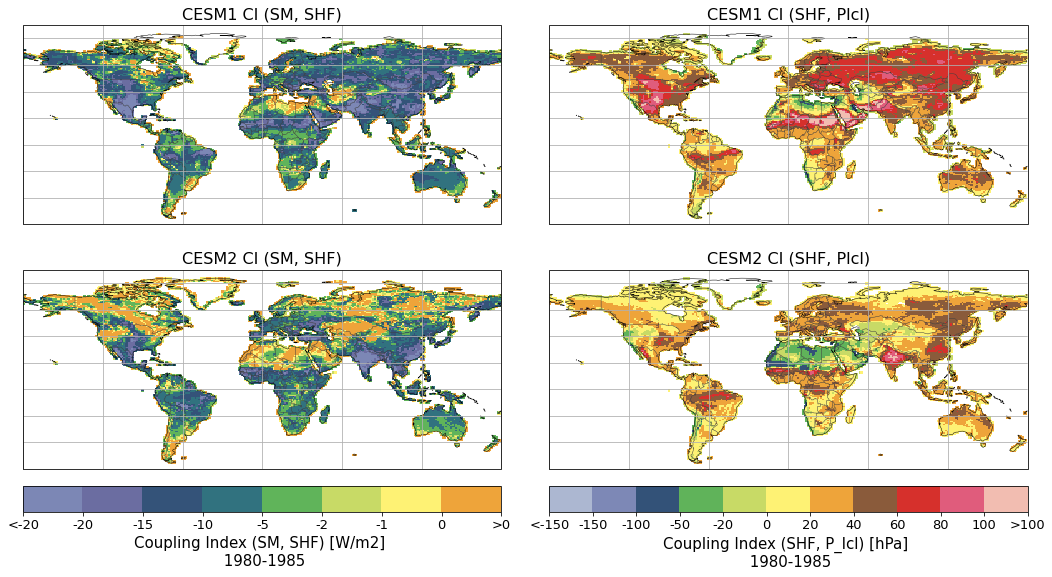

In [115]:
# Set up figure 
fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
#Adjust space between subplots 
fig.subplots_adjust(hspace = -0.4,wspace = 0.1)
#Put axs handles in array, axs 
axs = axs.ravel()


# Set global-ish extent
axs[0].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())      
axs[1].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())       
axs[2].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())      
axs[3].set_extent([-180,180,-60,90], crs=ccrs.PlateCarree()) 

# ---- Plot Terrestrial Leg (SM-SHF) ------ 
bounds = [1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Plot contour map
contour_plot = axs[0].pcolormesh(lon_cyclic,lat,colorsTerraLeg_cesm1,norm=norm,   # CESM1
                             cmap=my_cmap_SMvSHF,
                             vmin=1,vmax=9)
contour_plot = axs[2].pcolormesh(lon_cyclic,lat,colorsTerraLeg_cesm2,norm=norm,   # CESM2 
                             cmap=my_cmap_SMvSHF,
                             vmin=1,vmax=9)
# Additional options 
axs[0].set_title('CESM1 CI (SM, SHF)',fontsize=16)
axs[2].set_title('CESM2 CI (SM, SHF)',fontsize=16)

axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
axs[2].coastlines(linewidth=0.5,edgecolor='0.25')

axs[0].gridlines()
axs[2].gridlines()

axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

# Add colorbar 
ax_position = axs[2].get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.05, ax_position.width, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SM, SHF) [W/m2] \n '+timeStr,fontsize=15)
cbar.ax.set_xticklabels(['<-20','-20','-15','-10','-5','-2','-1','0','>0'],fontsize=13)  # vertically oriented colorbar



# ---- Plot Atmospheric Leg (SHF-Plcl) ------ 
bounds = [1,2,3,4,5,6,7,8,9,10,11,12]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Plot contour map
contour_plot = axs[1].pcolormesh(lon_cyclic,lat,colorsAtmoLeg_cesm1*lndMask,norm=norm,   # CESM1
                             cmap=my_cmap_SHFvPlcl,
                             vmin=1,vmax=12)
contour_plot = axs[3].pcolormesh(lon_cyclic,lat,colorsAtmoLeg_cesm2*lndMask,norm=norm,   # CESM2 
                             cmap=my_cmap_SHFvPlcl,
                             vmin=1,vmax=12)
# Additional options 
axs[1].set_title('CESM1 CI (SHF, Plcl)',fontsize=16)
axs[3].set_title('CESM2 CI (SHF, Plcl)',fontsize=16)

axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
axs[3].coastlines(linewidth=0.5,edgecolor='0.25')

axs[1].gridlines()
axs[3].gridlines()

axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

# Colorbar
ax_position = axs[3].get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.05, ax_position.width, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SHF, P_lcl) [hPa] \n '+timeStr,fontsize=15)
cbar.ax.set_xticklabels(['<-150','-150','-100','-50','-20','0','20','40','60','80','100','>100'],fontsize=13)  # vertically oriented colorbar


plt.show()

# Save out to file
fileDir = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Figures/'
fig.savefig(fileDir+'CESM1v2_CouplingIndex_SM-SHF-Plcl_'+timeStr+'.png')

